In [34]:
import tensorflow as tf
tf.__version__


'2.9.3'

In [1]:
!pip install gdown

In [2]:
!conda --version

conda 24.9.2


In [3]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install tensorflow
!pip install keras

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached o

In [6]:
!gdown 119KoKiTXpEL6t5_i1YSMWT6qTtdlXnpB

Downloading...
From (original): https://drive.google.com/uc?id=119KoKiTXpEL6t5_i1YSMWT6qTtdlXnpB
From (redirected): https://drive.google.com/uc?id=119KoKiTXpEL6t5_i1YSMWT6qTtdlXnpB&confirm=t&uuid=345f468a-54f2-4f69-a7af-c46db668dd98
To: c:\Users\imirf\OneDrive\Desktop\TeaTreePred-main\Training files\Dataset.zip

  0%|          | 0.00/74.8M [00:00<?, ?B/s]
  1%|          | 524k/74.8M [00:00<01:19, 940kB/s]
  3%|▎         | 2.10M/74.8M [00:00<00:25, 2.81MB/s]
  8%|▊         | 6.29M/74.8M [00:00<00:07, 9.38MB/s]
 14%|█▍        | 10.5M/74.8M [00:01<00:04, 14.6MB/s]
 18%|█▊        | 13.6M/74.8M [00:01<00:03, 15.7MB/s]
 22%|██▏       | 16.3M/74.8M [00:01<00:03, 17.0MB/s]
 25%|██▌       | 18.9M/74.8M [00:01<00:03, 15.8MB/s]
 28%|██▊       | 21.0M/74.8M [00:01<00:03, 14.5MB/s]
 31%|███       | 23.1M/74.8M [00:01<00:03, 14.0MB/s]
 33%|███▎      | 24.6M/74.8M [00:02<00:03, 13.1MB/s]
 36%|███▌      | 26.7M/74.8M [00:02<00:03, 12.8MB/s]
 38%|███▊      | 28.3M/74.8M [00:02<00:03, 12.9MB/s]
 40%|███

In [7]:
!unzip Dataset.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
import keras
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator


ModuleNotFoundError: No module named 'keras'

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data paths and other parameters
train_dir = './Dataset/train'
val_dir = './Dataset/test'
batch_size = 32
img_size = (224, 224)
num_epochs = 10

# Create a data generator with normalization and data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

# Load the VGG16 model without the top layer
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the VGG16 model
for layer in vgg_model.layers:
    layer.trainable = False

# Add a custom top layer for classification
x = Flatten()(vgg_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create a new model with the VGG16 base and the custom top layer
model = Model(inputs=vgg_model.input, outputs=predictions)

# Compile the model with a categorical crossentropy loss and an Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data and validate on the validation data
history = model.fit(train_generator, epochs=num_epochs, validation_data=val_generator)

# Evaluate the model on the validation data
model.evaluate(val_generator)

Found 787 images belonging to 8 classes.
Found 55 images belonging to 8 classes.
Epoch 1/10
25/25 [==============================] - 239s 10s/step - loss: 4.9209 - accuracy: 0.2503 - val_loss: 1.9692 - val_accuracy: 0.3091
Epoch 2/10
25/25 [==============================] - 235s 9s/step - loss: 1.2737 - accuracy: 0.5299 - val_loss: 1.5650 - val_accuracy: 0.4364
Epoch 3/10
25/25 [==============================] - 237s 9s/step - loss: 1.0157 - accuracy: 0.6252 - val_loss: 1.3592 - val_accuracy: 0.4727
Epoch 4/10
25/25 [==============================] - 238s 9s/step - loss: 0.8441 - accuracy: 0.6950 - val_loss: 1.5204 - val_accuracy: 0.4545
Epoch 5/10
25/25 [==============================] - 237s 9s/step - loss: 0.7442 - accuracy: 0.7128 - val_loss: 1.6595 - val_accuracy: 0.4364
Epoch 6/10
25/25 [==============================] - 237s 9s/step - loss: 0.7382 - accuracy: 0.7205 - val_loss: 1.3154 - val_accuracy: 0.6000
Epoch 7/10
25/25 [==============================] - 236s 9s/step - loss:

[1.5713309049606323, 0.4727272689342499]

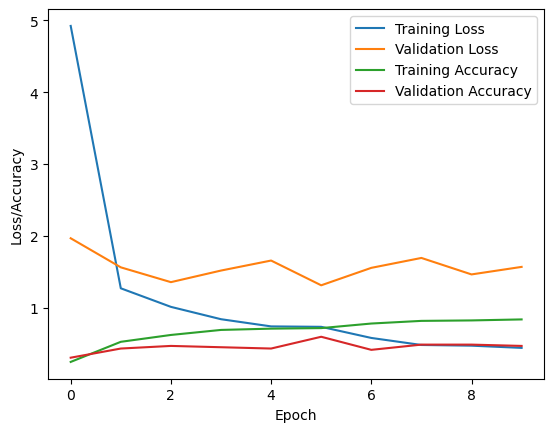

In [12]:
import matplotlib.pyplot as plt

# Plot the loss and accuracy of the model during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [ ]:
#save model
from tensorflow.keras.models import load_model

model.save('vgg-16-Tea-leaves-disease-model-600.h5')

In [ ]:
#Loading the model
from tensorflow.keras.models import load_model


model = load_model('vgg-16-Tea-leaves-disease-model-600.h5')

#Testing the model
import numpy as np
import keras.utils as image
test_image = image.load_img('./IMG_20220503_143242.jpg', target_size = (600, 600))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

print(result)
#Print the result

In [40]:
#deployment 
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"Sj4ZqPhGrHuFU-eXpjshfyeiaurI3Vf2M4NtmzPDToNU"
}

In [41]:
#validation
client=APIClient(wml_credentials)

In [42]:
client

In [43]:
def uid_space_name(client,teapred_depl):
  space=client.spaces.get_details()
  return(next(item for item in space['resources'] if item['entity']['name']==teapred_depl)['metadata']['id'])

In [44]:
space_uid=uid_space_name(client,'teapred_depl')
print(space_uid)

367dc263-bbbe-4960-bd29-f87b6c5e2a17


In [45]:
client.set.default_space(space_uid)

'SUCCESS'

In [47]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----  ------------------  ------------------------------
NAME                             ID                                    TYPE  STATE               REPLACEMENT
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  unsupported         runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10          01ce9391-1a79-5a33-94fb-2e134337f314  base  not_provided
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base  not_provided
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base  not_provided
tensorflow_rt23.1-py3.10         079a91e0-245f-5269-8926-3c20b28f37dc  base  not_provided
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  unsupported         runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  unsupported
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base  dep

,NAME,ID,TYPE,STATE,REPLACEMENT
0,default_py3.6,0062b8c9-8b7d-44a0-a9b9-46c416adcbd9,base,unsupported,runtime-22.2-py3.10
1,autoai-ts_rt23.1-py3.10,01ce9391-1a79-5a33-94fb-2e134337f314,base,not_provided,
2,kernel-spark3.2-scala2.12,020d69ce-7ac1-5e68-ac1a-31189867356a,base,not_provided,
3,pytorch-onnx_1.3-py3.7-edt,069ea134-3346-5748-b513-49120e15d288,base,not_provided,
4,tensorflow_rt23.1-py3.10,079a91e0-245f-5269-8926-3c20b28f37dc,base,not_provided,
...,...,...,...,...,...
106,tensorflow_rt22.2-py3.10,f65bd165-f057-55de-b5cb-f97cf2c0f393,base,supported,
107,do_20.1,f686cdd9-7904-5f9d-a732-01b0d6b10dc5,base,supported,
108,pytorch-onnx_rt22.2-py3.10-edt,f8a05d07-e7cd-57bb-a10b-23f1d4b837ac,base,supported,
109,scikit-learn_0.19-py3.6,f963fa9d-4bb7-5652-9c5d-8d9289ef6ad9,base,unsupported,runtime-22.2-py3.10


In [48]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.2-py3.10')

In [49]:
software_space_uid

'f65bd165-f057-55de-b5cb-f97cf2c0f393'

In [50]:
import tensorflow as tf
tf.__version__

'2.9.3'

In [51]:
!ls

Dataset      Miniconda3-py37_4.12.0-Linux-x86_64.sh  model.tgz
Dataset.zip  Miniconda3.sh


In [52]:
from ibm_watson_machine_learning.libs.repo.mlrepository import meta_props
model_details=client.repository.store_model(model='model.tgz',
                                            meta_props={
    client.repository.ModelMetaNames.NAME:"cnn model",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.9',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [53]:
model_id=client.repository.get_model_id(model_details)

In [54]:
model_id

'03fbddc9-485e-4642-8b0e-351ebe9a2575'